In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [101]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-100, 100),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

In [121]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 2000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 642us/step - loss: 0.9016 - acc: 0.5099 - val_loss: 0.7850 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 125us/step - loss: 0.7054 - acc: 0.6220 - val_loss: 0.6555 - val_acc: 0.6404
Epoch 3/1000
455/455 [==============================] - 0s 120us/step - loss: 0.6286 - acc: 0.6418 - val_loss: 0.6070 - val_acc: 0.6579
Epoch 4/1000
455/455 [==============================] - 0s 104us/step - loss: 0.5897 - acc: 0.6725 - val_loss: 0.5678 - val_acc: 0.6579
Epoch 5/1000
455/455 [==============================] - 0s 97us/step - loss: 0.5516 - acc: 0.6945 - val_loss: 0.5342 - val_acc: 0.7105
Epoch 6/1000
455/455 [==============================] - 0s 95us/step - loss: 0.5235 - acc: 0.7341 - val_loss: 0.5073 - val_acc: 0.8421
Epoch 7/1000
455/455 [==============================] - 0s 131us/step - loss: 0.4977 - acc: 0.8396 - val_loss: 0.4813 - val_acc: 0.8246
Epoc

455/455 [==============================] - 0s 87us/step - loss: 0.2548 - acc: 0.9033 - val_loss: 0.2500 - val_acc: 0.9035
Epoch 61/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2542 - acc: 0.9033 - val_loss: 0.2496 - val_acc: 0.9035
Epoch 62/1000
455/455 [==============================] - 0s 95us/step - loss: 0.2538 - acc: 0.9055 - val_loss: 0.2492 - val_acc: 0.9035
Epoch 63/1000
455/455 [==============================] - 0s 99us/step - loss: 0.2519 - acc: 0.9033 - val_loss: 0.2474 - val_acc: 0.9035
Epoch 64/1000
455/455 [==============================] - 0s 96us/step - loss: 0.2514 - acc: 0.9033 - val_loss: 0.2482 - val_acc: 0.9035
Epoch 65/1000
455/455 [==============================] - 0s 101us/step - loss: 0.2509 - acc: 0.9055 - val_loss: 0.2471 - val_acc: 0.9035
Epoch 66/1000
455/455 [==============================] - 0s 106us/step - loss: 0.2495 - acc: 0.9055 - val_loss: 0.2468 - val_acc: 0.9035
Epoch 67/1000
455/455 [==============================] - 0s 

Epoch 120/1000
455/455 [==============================] - 0s 125us/step - loss: 0.2223 - acc: 0.9143 - val_loss: 0.2256 - val_acc: 0.9123
Epoch 121/1000
455/455 [==============================] - 0s 107us/step - loss: 0.2219 - acc: 0.9143 - val_loss: 0.2245 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 102us/step - loss: 0.2225 - acc: 0.9121 - val_loss: 0.2256 - val_acc: 0.9035
Epoch 123/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2214 - acc: 0.9143 - val_loss: 0.2246 - val_acc: 0.9123
Epoch 124/1000
455/455 [==============================] - 0s 114us/step - loss: 0.2203 - acc: 0.9121 - val_loss: 0.2286 - val_acc: 0.9035
Epoch 125/1000
455/455 [==============================] - 0s 97us/step - loss: 0.2220 - acc: 0.9121 - val_loss: 0.2251 - val_acc: 0.9035
Epoch 126/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2202 - acc: 0.9143 - val_loss: 0.2238 - val_acc: 0.9123
Epoch 127/1000
455/455 [=============

455/455 [==============================] - 0s 83us/step - loss: 0.2083 - acc: 0.9165 - val_loss: 0.2141 - val_acc: 0.9123
Epoch 180/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2090 - acc: 0.9143 - val_loss: 0.2146 - val_acc: 0.9123
Epoch 181/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2078 - acc: 0.9165 - val_loss: 0.2157 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2085 - acc: 0.9143 - val_loss: 0.2144 - val_acc: 0.9123
Epoch 183/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2091 - acc: 0.9143 - val_loss: 0.2153 - val_acc: 0.9123
Epoch 184/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2078 - acc: 0.9165 - val_loss: 0.2150 - val_acc: 0.9123
Epoch 185/1000
455/455 [==============================] - 0s 71us/step - loss: 0.2079 - acc: 0.9165 - val_loss: 0.2135 - val_acc: 0.9123
Epoch 186/1000
455/455 [==============================] 

Epoch 239/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2002 - acc: 0.9165 - val_loss: 0.2100 - val_acc: 0.9211
Epoch 240/1000
455/455 [==============================] - 0s 64us/step - loss: 0.2000 - acc: 0.9165 - val_loss: 0.2107 - val_acc: 0.9211
Epoch 241/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1996 - acc: 0.9165 - val_loss: 0.2091 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1997 - acc: 0.9165 - val_loss: 0.2101 - val_acc: 0.9211
Epoch 243/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2001 - acc: 0.9209 - val_loss: 0.2116 - val_acc: 0.9211
Epoch 244/1000
455/455 [==============================] - 0s 109us/step - loss: 0.1996 - acc: 0.9231 - val_loss: 0.2098 - val_acc: 0.9211
Epoch 245/1000
455/455 [==============================] - 0s 148us/step - loss: 0.1994 - acc: 0.9187 - val_loss: 0.2085 - val_acc: 0.9211
Epoch 246/1000
455/455 [===============

455/455 [==============================] - 0s 121us/step - loss: 0.1946 - acc: 0.9209 - val_loss: 0.2069 - val_acc: 0.9211
Epoch 299/1000
455/455 [==============================] - 0s 127us/step - loss: 0.1944 - acc: 0.9209 - val_loss: 0.2060 - val_acc: 0.9211
Epoch 300/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1945 - acc: 0.9209 - val_loss: 0.2065 - val_acc: 0.9211
Epoch 301/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1947 - acc: 0.9209 - val_loss: 0.2083 - val_acc: 0.9211
Epoch 302/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1946 - acc: 0.9231 - val_loss: 0.2065 - val_acc: 0.9211
Epoch 303/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1943 - acc: 0.9231 - val_loss: 0.2063 - val_acc: 0.9211
Epoch 304/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1941 - acc: 0.9209 - val_loss: 0.2074 - val_acc: 0.9211
Epoch 305/1000
455/455 [==============================

Epoch 358/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1908 - acc: 0.9231 - val_loss: 0.2040 - val_acc: 0.9211
Epoch 359/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1909 - acc: 0.9231 - val_loss: 0.2020 - val_acc: 0.9298
Epoch 360/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1907 - acc: 0.9209 - val_loss: 0.2045 - val_acc: 0.9211
Epoch 361/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1903 - acc: 0.9209 - val_loss: 0.2027 - val_acc: 0.9298
Epoch 362/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1902 - acc: 0.9231 - val_loss: 0.2031 - val_acc: 0.9298
Epoch 363/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1911 - acc: 0.9231 - val_loss: 0.2043 - val_acc: 0.9211
Epoch 364/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1902 - acc: 0.9209 - val_loss: 0.2026 - val_acc: 0.9298
Epoch 365/1000
455/455 [=================

Epoch 418/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1884 - acc: 0.9209 - val_loss: 0.2011 - val_acc: 0.9298
Epoch 419/1000
455/455 [==============================] - 0s 61us/step - loss: 0.1879 - acc: 0.9231 - val_loss: 0.2000 - val_acc: 0.9298
Epoch 420/1000
455/455 [==============================] - 0s 65us/step - loss: 0.1871 - acc: 0.9231 - val_loss: 0.2005 - val_acc: 0.9298
Epoch 421/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1875 - acc: 0.9209 - val_loss: 0.2013 - val_acc: 0.9298
Epoch 422/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1874 - acc: 0.9231 - val_loss: 0.2008 - val_acc: 0.9298
Epoch 423/1000
455/455 [==============================] - 0s 166us/step - loss: 0.1885 - acc: 0.9275 - val_loss: 0.2039 - val_acc: 0.9211
Epoch 424/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1870 - acc: 0.9231 - val_loss: 0.2004 - val_acc: 0.9298
Epoch 425/1000
455/455 [===============

Epoch 478/1000
455/455 [==============================] - 0s 127us/step - loss: 0.1847 - acc: 0.9275 - val_loss: 0.1994 - val_acc: 0.9298
Epoch 479/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1846 - acc: 0.9253 - val_loss: 0.2005 - val_acc: 0.9298
Epoch 480/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1848 - acc: 0.9275 - val_loss: 0.1993 - val_acc: 0.9298
Epoch 481/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1847 - acc: 0.9253 - val_loss: 0.1975 - val_acc: 0.9298
Epoch 482/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1856 - acc: 0.9253 - val_loss: 0.1995 - val_acc: 0.9298
Epoch 483/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1843 - acc: 0.9297 - val_loss: 0.1997 - val_acc: 0.9298
Epoch 484/1000
455/455 [==============================] - 0s 68us/step - loss: 0.1847 - acc: 0.9253 - val_loss: 0.1987 - val_acc: 0.9298
Epoch 485/1000
455/455 [================

455/455 [==============================] - 0s 73us/step - loss: 0.1844 - acc: 0.9253 - val_loss: 0.1962 - val_acc: 0.9298
Epoch 538/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1818 - acc: 0.9253 - val_loss: 0.1981 - val_acc: 0.9298
Epoch 539/1000
455/455 [==============================] - 0s 67us/step - loss: 0.1836 - acc: 0.9253 - val_loss: 0.1990 - val_acc: 0.9298
Epoch 540/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1833 - acc: 0.9253 - val_loss: 0.1962 - val_acc: 0.9298
Epoch 541/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1818 - acc: 0.9275 - val_loss: 0.1980 - val_acc: 0.9298
Epoch 542/1000
455/455 [==============================] - 0s 114us/step - loss: 0.1819 - acc: 0.9297 - val_loss: 0.1987 - val_acc: 0.9298
Epoch 543/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1818 - acc: 0.9275 - val_loss: 0.1999 - val_acc: 0.9298
Epoch 544/1000
455/455 [==============================]

Epoch 597/1000
455/455 [==============================] - 0s 57us/step - loss: 0.1799 - acc: 0.9297 - val_loss: 0.1966 - val_acc: 0.9298
Epoch 598/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1803 - acc: 0.9297 - val_loss: 0.1967 - val_acc: 0.9298
Epoch 599/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1798 - acc: 0.9297 - val_loss: 0.1967 - val_acc: 0.9298
Epoch 600/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1800 - acc: 0.9297 - val_loss: 0.1964 - val_acc: 0.9298
Epoch 601/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1809 - acc: 0.9297 - val_loss: 0.1966 - val_acc: 0.9298
Epoch 602/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1796 - acc: 0.9275 - val_loss: 0.1948 - val_acc: 0.9298
Epoch 603/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1805 - acc: 0.9275 - val_loss: 0.1959 - val_acc: 0.9298
Epoch 604/1000
455/455 [================

455/455 [==============================] - 0s 119us/step - loss: 0.1788 - acc: 0.9231 - val_loss: 0.1978 - val_acc: 0.9298
Epoch 657/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1777 - acc: 0.9253 - val_loss: 0.1945 - val_acc: 0.9298
Epoch 658/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1779 - acc: 0.9297 - val_loss: 0.1941 - val_acc: 0.9298
Epoch 659/1000
455/455 [==============================] - 0s 124us/step - loss: 0.1779 - acc: 0.9275 - val_loss: 0.1958 - val_acc: 0.9298
Epoch 660/1000
455/455 [==============================] - 0s 130us/step - loss: 0.1780 - acc: 0.9297 - val_loss: 0.1957 - val_acc: 0.9298
Epoch 661/1000
455/455 [==============================] - 0s 124us/step - loss: 0.1778 - acc: 0.9253 - val_loss: 0.1960 - val_acc: 0.9298
Epoch 662/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1783 - acc: 0.9231 - val_loss: 0.1959 - val_acc: 0.9298
Epoch 663/1000
455/455 [=========================

455/455 [==============================] - 0s 89us/step - loss: 0.1762 - acc: 0.9275 - val_loss: 0.1936 - val_acc: 0.9298
Epoch 716/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1768 - acc: 0.9275 - val_loss: 0.1928 - val_acc: 0.9298
Epoch 717/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1779 - acc: 0.9319 - val_loss: 0.1921 - val_acc: 0.9298
Epoch 718/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1783 - acc: 0.9275 - val_loss: 0.1959 - val_acc: 0.9298
Epoch 719/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1762 - acc: 0.9275 - val_loss: 0.1933 - val_acc: 0.9298
Epoch 720/1000
455/455 [==============================] - 0s 172us/step - loss: 0.1759 - acc: 0.9275 - val_loss: 0.1927 - val_acc: 0.9298
Epoch 721/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1774 - acc: 0.9297 - val_loss: 0.1924 - val_acc: 0.9298
Epoch 722/1000
455/455 [=============================

455/455 [==============================] - 0s 103us/step - loss: 0.1745 - acc: 0.9253 - val_loss: 0.1921 - val_acc: 0.9298
Epoch 775/1000
455/455 [==============================] - 0s 111us/step - loss: 0.1748 - acc: 0.9275 - val_loss: 0.1920 - val_acc: 0.9298
Epoch 776/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1749 - acc: 0.9253 - val_loss: 0.1932 - val_acc: 0.9298
Epoch 777/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1746 - acc: 0.9253 - val_loss: 0.1932 - val_acc: 0.9298
Epoch 778/1000
455/455 [==============================] - 0s 127us/step - loss: 0.1752 - acc: 0.9275 - val_loss: 0.1915 - val_acc: 0.9298
Epoch 779/1000
455/455 [==============================] - 0s 123us/step - loss: 0.1747 - acc: 0.9253 - val_loss: 0.1923 - val_acc: 0.9298
Epoch 780/1000
455/455 [==============================] - 0s 120us/step - loss: 0.1747 - acc: 0.9275 - val_loss: 0.1919 - val_acc: 0.9298
Epoch 781/1000
455/455 [=========================

455/455 [==============================] - 0s 99us/step - loss: 0.1729 - acc: 0.9253 - val_loss: 0.1914 - val_acc: 0.9298
Epoch 834/1000
455/455 [==============================] - 0s 117us/step - loss: 0.1727 - acc: 0.9275 - val_loss: 0.1915 - val_acc: 0.9298
Epoch 835/1000
455/455 [==============================] - 0s 128us/step - loss: 0.1730 - acc: 0.9253 - val_loss: 0.1914 - val_acc: 0.9298
Epoch 836/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1731 - acc: 0.9275 - val_loss: 0.1908 - val_acc: 0.9298
Epoch 837/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1735 - acc: 0.9253 - val_loss: 0.1926 - val_acc: 0.9298
Epoch 838/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1732 - acc: 0.9253 - val_loss: 0.1917 - val_acc: 0.9298
Epoch 839/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1726 - acc: 0.9253 - val_loss: 0.1906 - val_acc: 0.9298
Epoch 840/1000
455/455 [=============================

455/455 [==============================] - 0s 99us/step - loss: 0.1716 - acc: 0.9275 - val_loss: 0.1889 - val_acc: 0.9298
Epoch 893/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1728 - acc: 0.9297 - val_loss: 0.1898 - val_acc: 0.9298
Epoch 894/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1715 - acc: 0.9253 - val_loss: 0.1914 - val_acc: 0.9298
Epoch 895/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1721 - acc: 0.9253 - val_loss: 0.1931 - val_acc: 0.9298
Epoch 896/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1719 - acc: 0.9253 - val_loss: 0.1922 - val_acc: 0.9298
Epoch 897/1000
455/455 [==============================] - 0s 115us/step - loss: 0.1734 - acc: 0.9253 - val_loss: 0.1934 - val_acc: 0.9298
Epoch 898/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1716 - acc: 0.9275 - val_loss: 0.1901 - val_acc: 0.9298
Epoch 899/1000
455/455 [==============================

455/455 [==============================] - 0s 105us/step - loss: 0.1701 - acc: 0.9253 - val_loss: 0.1896 - val_acc: 0.9298
Epoch 952/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1699 - acc: 0.9253 - val_loss: 0.1896 - val_acc: 0.9298
Epoch 953/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1700 - acc: 0.9253 - val_loss: 0.1899 - val_acc: 0.9298
Epoch 954/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1706 - acc: 0.9253 - val_loss: 0.1887 - val_acc: 0.9298
Epoch 955/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1708 - acc: 0.9275 - val_loss: 0.1901 - val_acc: 0.9298
Epoch 956/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1699 - acc: 0.9253 - val_loss: 0.1890 - val_acc: 0.9298
Epoch 957/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1701 - acc: 0.9275 - val_loss: 0.1895 - val_acc: 0.9298
Epoch 958/1000
455/455 [==============================

In [122]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [123]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.934
best validation accuracy: 0.930


# Weight analysis

In [124]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return np.sum(abs(l) >= 0) - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(200)

# Graphics

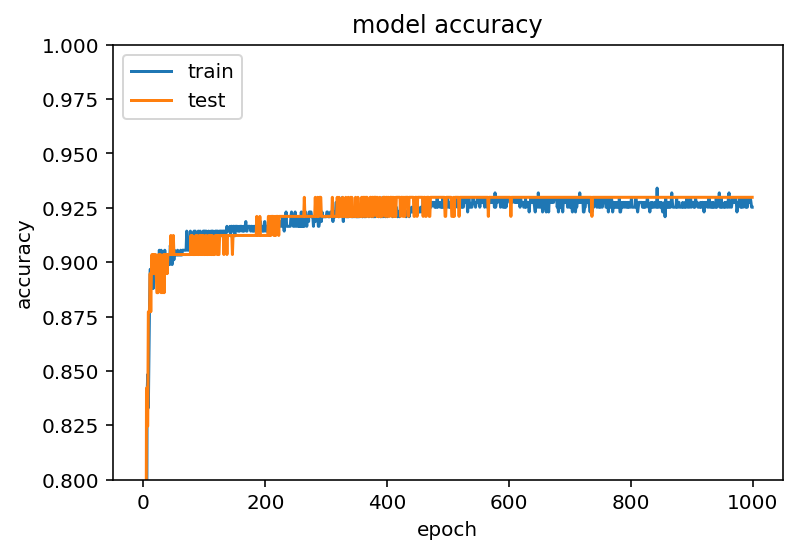

In [125]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

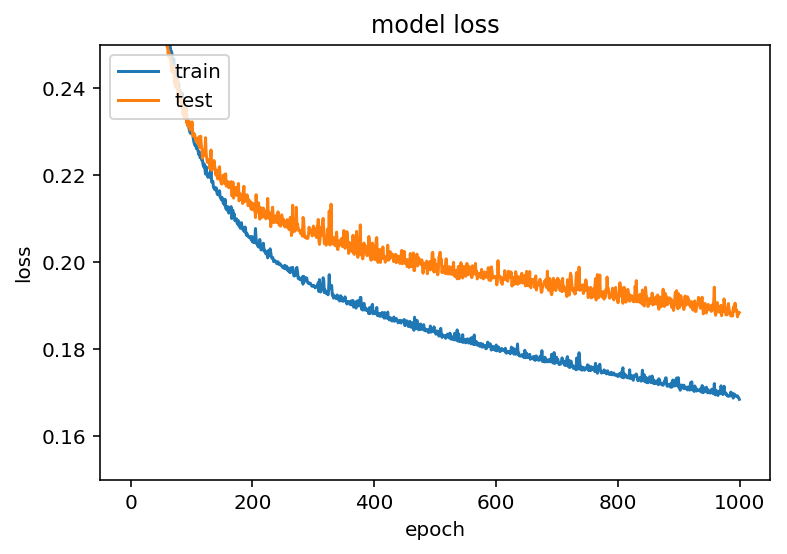

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.15, 0.25])
plt.show()

In [127]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

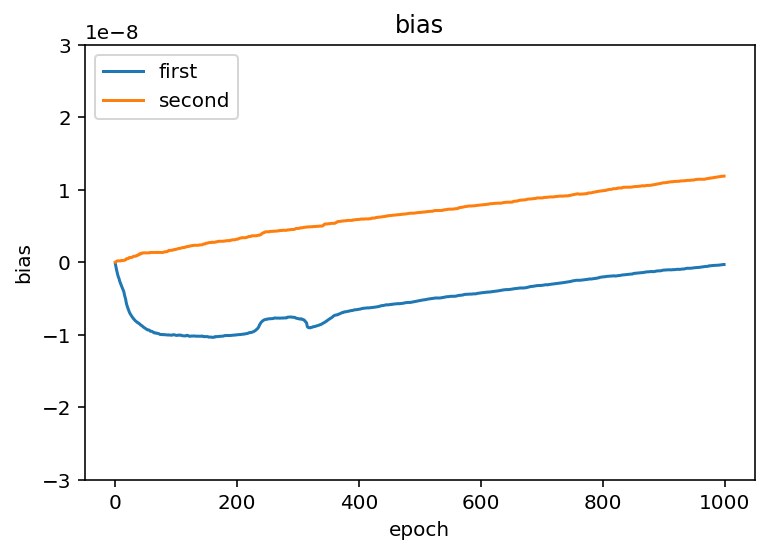

In [138]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
plt.ylim([-3e-8, 3e-8])
plt.show()

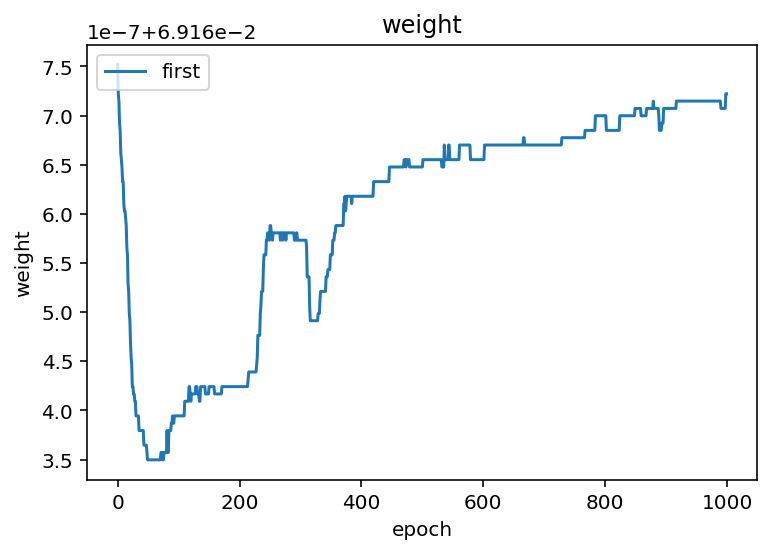

In [129]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

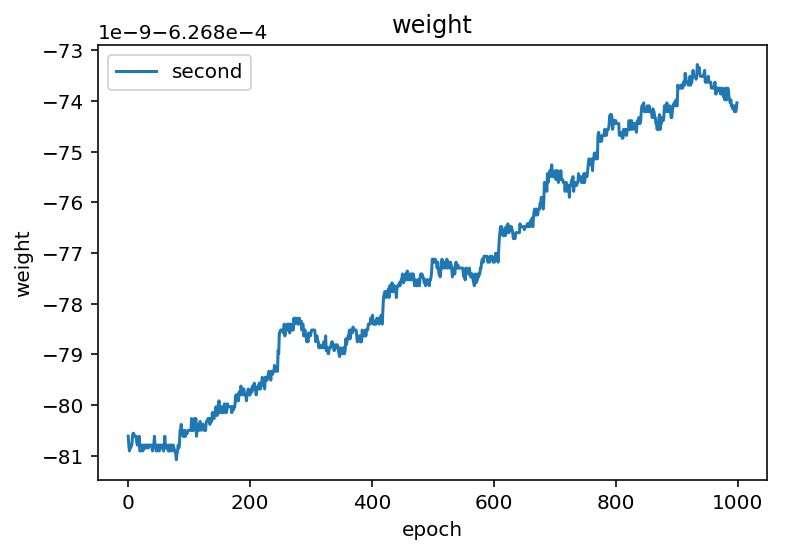

In [130]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

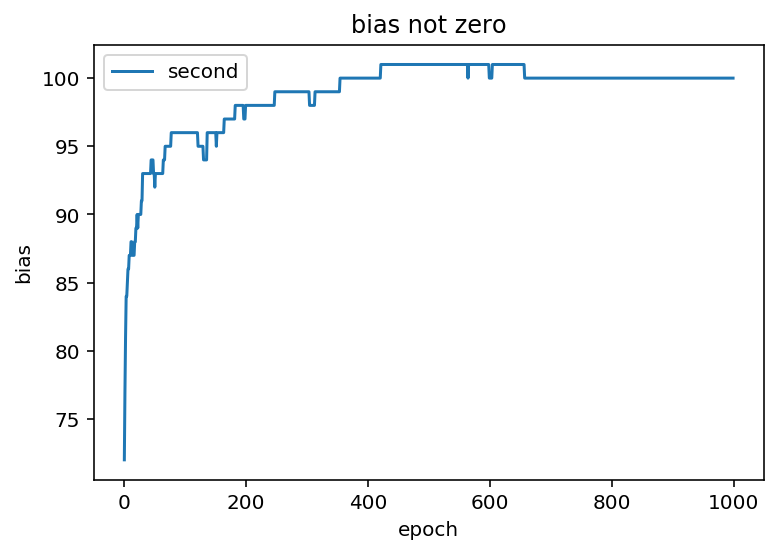

In [131]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

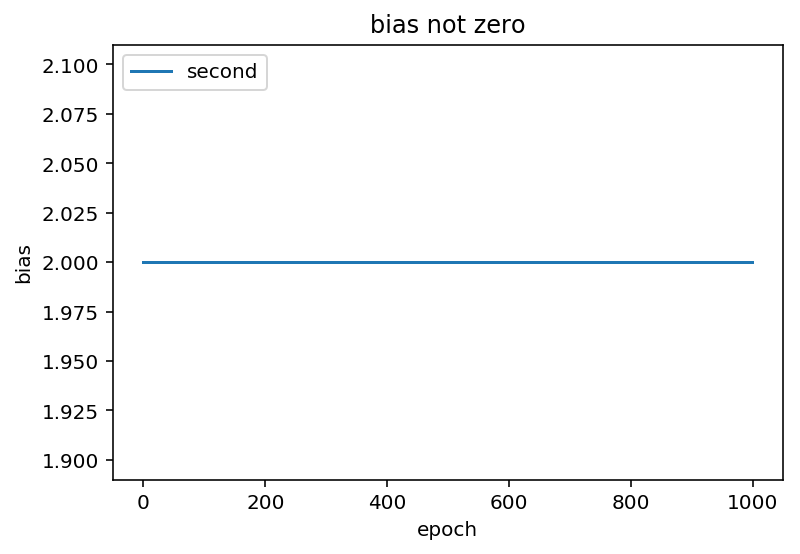

In [132]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

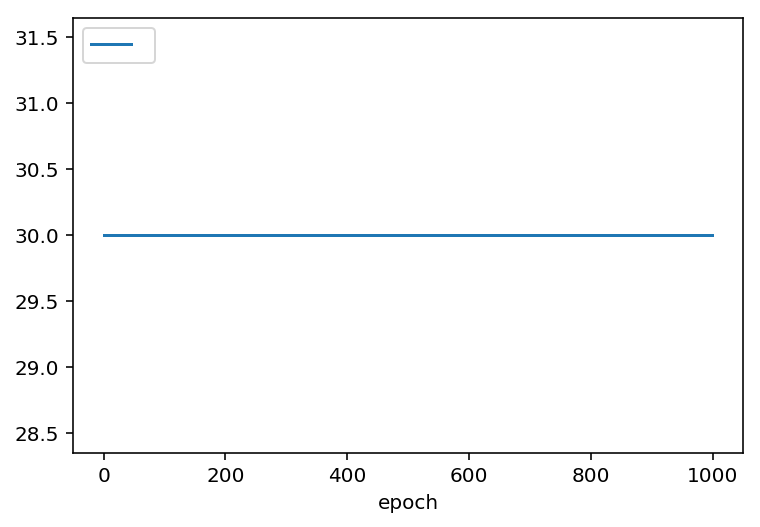

In [133]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

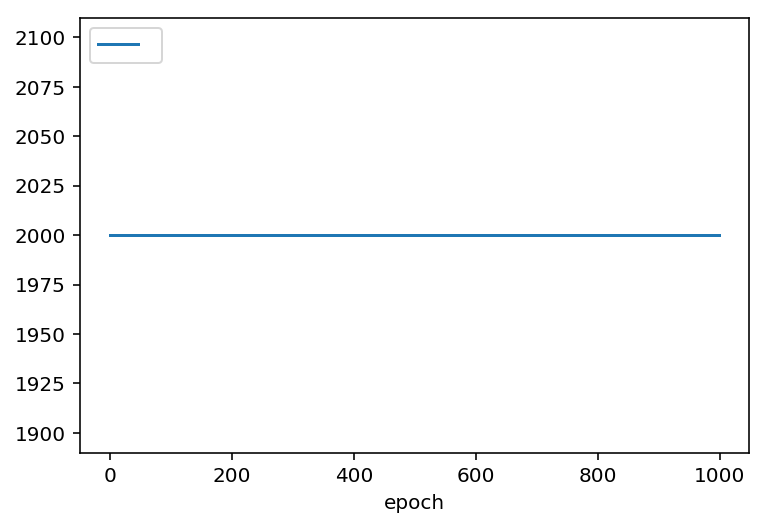

In [134]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

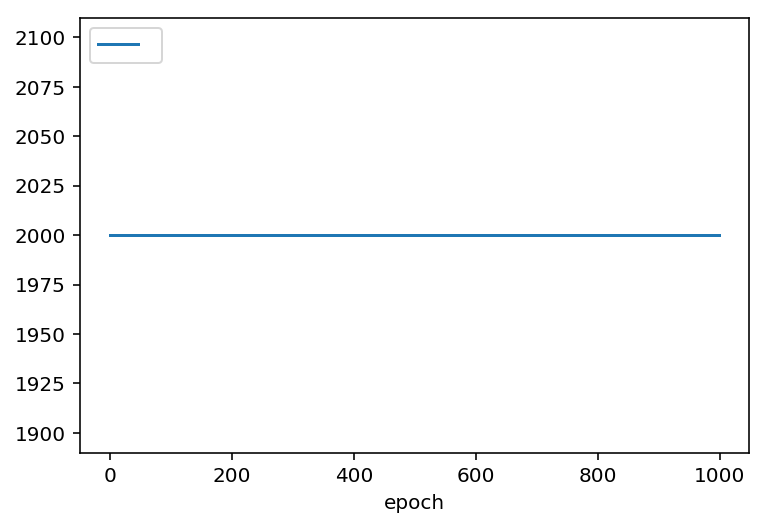

In [135]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

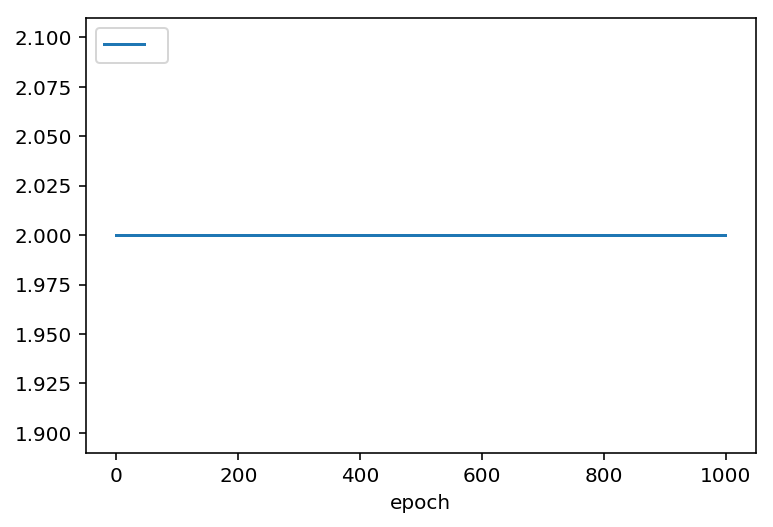

In [136]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()